In [ ]:
# -*- coding: utf-8 -*-
"""
Ejercicio Resuelto: Análisis Detallado de Transacciones de E-commerce

Este Jupyter Notebook presenta una solución al ejercicio autónomo propuesto para la Semana 1
de la asignatura "Arquitectura, Modelado y Gestión de Datos en Data Science",
cuyo objetivo es desarrollar habilidades en el uso de librerías Python (NumPy, Pandas, Matplotlib, Seaborn)
para el análisis exploratorio, limpieza, procesamiento e ingeniería de datos.
"""

# # Ejercicio Resuelto: Análisis Detallado de Transacciones de E-commerce

## Introducción y Objetivo
"""
Este cuaderno demuestra un proceso completo de Análisis Exploratorio de Datos (EDA) y preprocesamiento de un dataset simulado de transacciones de e-commerce. A lo largo de este ejercicio, aplicaremos las funcionalidades aprendidas de las librerías `pandas`, `numpy`, `matplotlib` y `seaborn` para:

1.  **Explorar** la estructura y la calidad de los datos.
2.  **Limpiar** el dataset, manejando valores nulos, tipos de datos incorrectos y algunas inconsistencias.
3.  **Realizar **ingeniería de características** básica para derivar nuevas variables útiles.
4.  **Analizar** patrones clave en las transacciones mediante agregaciones.
5.  **Visualizar** los hallazgos principales para obtener insights sobre el comportamiento de compra.

Este ejercicio emula un escenario real donde un analista de datos debe preparar y entender un conjunto de datos antes de un análisis más profundo o modelado.

---

## 0. Importación de Librerías

Comenzamos importando todas las librerías necesarias para nuestro análisis. Mantener las importaciones al inicio es una buena práctica.
"""
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import random
from datetime import datetime, timedelta

# Configuración para mejorar la visualización de los gráficos
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (10, 6) # Tamaño por defecto de las figuras
plt.rcParams['figure.dpi'] = 100 # Resolución de las figuras

## 1️⃣ Generación del Dataset Simulado

In [ ]:
# Número de transacciones a simular
N_ROWS = 1000

# Listas de valores posibles para las columnas categóricas
productos = [
    {"SKU": f"PROD{i:03d}", "Nombre": f"Producto {i}", "Categoria": random.choice(["Electrónica", "Ropa", "Hogar", "Libros", "Alimentos"]) }
    for i in range(50)
]
metodos_pago = ["Tarjeta", "PayPal", "Efectivo", "Transferencia"]
ciudades = ["Madrid", "Barcelona", "Valencia", "Sevilla", "Zaragoza", "Bilbao"]
clientes_id = [f"CLI{i:04d}" for i in range(200)] # 200 clientes únicos

# Generación de datos
data = {
    'ID_Transaccion': [f"TXN{i:04d}" for i in range(N_ROWS)],
    'ID_Cliente': [random.choice(clientes_id) for _ in range(N_ROWS)],
    'Fecha_Transaccion': [
        (datetime.now() - timedelta(days=random.randint(0, 365))).strftime("%Y-%m-%d %H:%M:%S")
        for _ in range(N_ROWS)
    ],
    'Cantidad': [random.randint(1, 5) for _ in range(N_ROWS)],
    'Precio_Unitario': [round(random.uniform(5, 200), 2) for _ in range(N_ROWS)],
    'Metodo_Pago': [random.choice(metodos_pago) for _ in range(N_ROWS)],
    'Ciudad_Envio': [random.choice(ciudades) for _ in range(N_ROWS)],
    'Calificacion_Producto': [random.randint(1, 5) for _ in range(N_ROWS)]
}

# Añadir productos y sus categorías
skus = [random.choice(productos) for _ in range(N_ROWS)]
data['Producto_SKU'] = [item["SKU"] for item in skus]
data['Nombre_Producto'] = [item["Nombre"] for item in skus]
data['Categoria_Producto'] = [item["Categoria"] for item in skus]


df = pd.DataFrame(data)

# --- Introducir problemas deliberadamente ---
# 1. Valores Nulos:
# Calificacion_Producto: 10% de nulos
df.loc[df.sample(frac=0.1, random_state=42).index, 'Calificacion_Producto'] = np.nan
# Ciudad_Envio: 5% de nulos
df.loc[df.sample(frac=0.05, random_state=42).index, 'Ciudad_Envio'] = np.nan

# 2. Tipos de Datos Incorrectos: (Fecha_Transaccion ya es string)
# Cantidad con algún valor negativo o cero
df.loc[df.sample(frac=0.02, random_state=42).index, 'Cantidad'] = random.choice([0, -1])
# Precio_Unitario con algún valor negativo o cero
df.loc[df.sample(frac=0.02, random_state=42).index, 'Precio_Unitario'] = random.choice([0, -0.5])

# 3. Inconsistencias en Cadenas de Texto:
# Ciudad_Envio con errores tipográficos o mayúsculas/minúsculas diferentes
df.loc[df.sample(frac=0.03, random_state=42).index, 'Ciudad_Envio'] = 'MADRIDd'
df.loc[df.sample(frac=0.03, random_state=42).index, 'Ciudad_Envio'] = 'barcelona'

print("Dataset simulado creado con éxito.")
print("Primeras 5 filas del dataset:")
display(df.head())

Dataset simulado creado con éxito.
Primeras 5 filas del dataset:


,ID_Transaccion,ID_Cliente,Fecha_Transaccion,Cantidad,Precio_Unitario,Metodo_Pago,Ciudad_Envio,Calificacion_Producto,Producto_SKU,Nombre_Producto,Categoria_Producto
0,TXN0000,CLI0114,2024-09-04 03:22:02,5,110.61,Transferencia,Madrid,4.0,PROD001,Producto 1,Libros
1,TXN0001,CLI0102,2025-01-11 03:22:02,5,44.79,Efectivo,Sevilla,4.0,PROD007,Producto 7,Electrónica
2,TXN0002,CLI0178,2025-07-16 03:22:02,3,153.10,Tarjeta,Madrid,2.0,PROD033,Producto 33,Libros
3,TXN0003,CLI0035,2025-02-14 03:22:02,5,10.94,Tarjeta,Madrid,3.0,PROD029,Producto 29,Hogar
4,TXN0004,CLI0027,2025-05-13 03:22:02,4,97.53,Transferencia,Sevilla,3.0,PROD001,Producto 1,Libros


## 2️⃣ Exploración Inicial de Datos

In [ ]:
print("--- Información general del DataFrame ---")


print("\n--- Estadísticas descriptivas de columnas numéricas ---")


print("\n--- Conteo de valores nulos por columna ---")

print("\n--- Exploración de columnas categóricas ---")


--- Información general del DataFrame ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   ID_Transaccion         1000 non-null   object 
 1   ID_Cliente             1000 non-null   object 
 2   Fecha_Transaccion      1000 non-null   object 
 3   Cantidad               1000 non-null   int64  
 4   Precio_Unitario        1000 non-null   float64
 5   Metodo_Pago            1000 non-null   object 
 6   Ciudad_Envio           980 non-null    object 
 7   Calificacion_Producto  900 non-null    float64
 8   Producto_SKU           1000 non-null   object 
 9   Nombre_Producto        1000 non-null   object 
 10  Categoria_Producto     1000 non-null   object 
dtypes: float64(2), int64(1), object(8)
memory usage: 86.1+ KB

--- Estadísticas descriptivas de columnas numéricas ---


,Cantidad,Precio_Unitario,Calificacion_Producto
count,1000.000000,1000.000000,900.000000
mean,2.986000,98.540290,3.011111
std,1.495339,55.703464,1.407073
min,-1.000000,-0.500000,1.000000
25%,2.000000,51.305000,2.000000
50%,3.000000,99.065000,3.000000
75%,4.000000,145.885000,4.000000
max,5.000000,198.960000,5.000000



--- Conteo de valores nulos por columna ---
Calificacion_Producto    100
Ciudad_Envio              20
dtype: int64

--- Exploración de columnas categóricas ---

Valores únicos en 'Categoria_Producto': 5
Top 5 valores más frecuentes en 'Categoria_Producto':
Categoria_Producto
Hogar          267
Libros         247
Electrónica    235
Ropa           157
Alimentos       94
Name: count, dtype: int64

Valores únicos en 'Metodo_Pago': 4
Top 5 valores más frecuentes en 'Metodo_Pago':
Metodo_Pago
Tarjeta          263
Efectivo         258
Transferencia    247
PayPal           232
Name: count, dtype: int64

Valores únicos en 'Ciudad_Envio': 7
Top 5 valores más frecuentes en 'Ciudad_Envio':
Ciudad_Envio
Sevilla     168
Bilbao      166
Valencia    163
Zaragoza    157
Madrid      149
Name: count, dtype: int64


## 3️⃣ Limpieza y Preprocesamiento de Datos

In [ ]:
print("--- Limpieza de Datos ---")

# 1. Manejo de Nulos
# Calificacion_Producto: Rellenar con la mediana


# Ciudad_Envio: Rellenar con la moda (valor más frecuente)



# 2. Conversión de Tipos


# 3. Manejo de Outliers/Valores Anómalos (Cantidad y Precio_Unitario)


# 4. Estandarización de Texto (Ciudad_Envio)




print("\n--- Verificación post-limpieza ---")
df.info()
print("\nConteo de nulos después de limpieza:", df.isnull().sum().sum()) # Total de nulos en todo el DataFrame
print("\nValores únicos en 'Ciudad_Envio' después de limpieza:", df['Ciudad_Envio'].value_counts())

--- Limpieza de Datos ---
Nulos manejados para 'Calificacion_Producto' y 'Ciudad_Envio'.
'Fecha_Transaccion' convertida a tipo datetime.
Se eliminaron 20 filas con 'Cantidad' o 'Precio_Unitario' <= 0.
Nombres de ciudades estandarizados.

--- Verificación post-limpieza ---
<class 'pandas.core.frame.DataFrame'>
Index: 980 entries, 0 to 999
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   ID_Transaccion         980 non-null    object        
 1   ID_Cliente             980 non-null    object        
 2   Fecha_Transaccion      980 non-null    datetime64[ns]
 3   Cantidad               980 non-null    int64         
 4   Precio_Unitario        980 non-null    float64       
 5   Metodo_Pago            980 non-null    object        
 6   Ciudad_Envio           980 non-null    object        
 7   Calificacion_Producto  980 non-null    int64         
 8   Producto_SKU           980 non-n

/tmp/ipython-input-5-585020302.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Calificacion_Producto'].fillna(median_rating, inplace=True)
/tmp/ipython-input-5-585020302.py:11: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inpl

## 4️⃣ Ingeniería de Características (Básica)

In [ ]:
print("--- Ingeniería de Características ---")

# Calcular Valor_Total_Transaccion

# Extraer componentes de la fecha


print("\nPrimeras 5 filas con las nuevas características:")
display(df.head())

--- Ingeniería de Características ---
'Valor_Total_Transaccion' calculada.
Componentes de la fecha (Año, Mes, Día de la semana) extraídos.

Primeras 5 filas con las nuevas características:


,ID_Transaccion,ID_Cliente,Fecha_Transaccion,Cantidad,Precio_Unitario,Metodo_Pago,Ciudad_Envio,Calificacion_Producto,Producto_SKU,Nombre_Producto,Categoria_Producto,Valor_Total_Transaccion,Año,Mes_Numero,Mes_Nombre,Dia_Semana
0,TXN0000,CLI0114,2024-09-04 03:22:02,5,110.61,Transferencia,madrid,4,PROD001,Producto 1,Libros,553.05,2024,9,September,Wednesday
1,TXN0001,CLI0102,2025-01-11 03:22:02,5,44.79,Efectivo,sevilla,4,PROD007,Producto 7,Electrónica,223.95,2025,1,January,Saturday
2,TXN0002,CLI0178,2025-07-16 03:22:02,3,153.10,Tarjeta,madrid,2,PROD033,Producto 33,Libros,459.30,2025,7,July,Wednesday
3,TXN0003,CLI0035,2025-02-14 03:22:02,5,10.94,Tarjeta,madrid,3,PROD029,Producto 29,Hogar,54.70,2025,2,February,Friday
4,TXN0004,CLI0027,2025-05-13 03:22:02,4,97.53,Transferencia,sevilla,3,PROD001,Producto 1,Libros,390.12,2025,5,May,Tuesday


## 5️⃣ Análisis y Agregación de Datos

In [ ]:
print("--- Análisis y Agregación de Datos ---")

# 1. Ventas totales por Categoría_Producto


# 2. Número de transacciones por Metodo_Pago


# 3. TOP 10 productos más vendidos por Valor_Total_Transaccion


# 4. Transacciones y valor total por mes
# Ordenar los meses correctamente (de Enero a Diciembre)
meses_orden = ['January', 'February', 'March', 'April', 'May', 'June',
               'July', 'August', 'September', 'October', 'November', 'December']


# 5. Calificación promedio por Categoria_Producto


--- Análisis y Agregación de Datos ---

### Ventas Totales por Categoría de Producto:
Categoria_Producto
Libros         75089.12
Hogar          73809.28
Electrónica    69626.31
Ropa           52210.48
Alimentos      30834.49
Name: Valor_Total_Transaccion, dtype: float64

### Número de Transacciones por Método de Pago:
Metodo_Pago
Tarjeta          258
Efectivo         251
Transferencia    243
PayPal           228
Name: count, dtype: int64

### TOP 10 Productos más Vendidos (por Valor Total de Transacción):
Producto_SKU  Nombre_Producto
PROD044       Producto 44        10896.55
PROD033       Producto 33         9782.23
PROD001       Producto 1          8865.71
PROD002       Producto 2          8634.74
PROD000       Producto 0          7935.16
PROD040       Producto 40         7926.56
PROD009       Producto 9          7901.51
PROD010       Producto 10         7516.05
PROD041       Producto 41         7443.89
PROD046       Producto 46         7284.27
Name: Valor_Total_Transaccion, dtype: f

/tmp/ipython-input-7-3835213602.py:24: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  analisis_mensual = df.groupby('Mes_Nombre').agg(


## 6️⃣ Visualización de Datos

--- Visualización de Datos ---


/tmp/ipython-input-9-2239885256.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=ventas_por_categoria.index, y=ventas_por_categoria.values, palette='viridis')


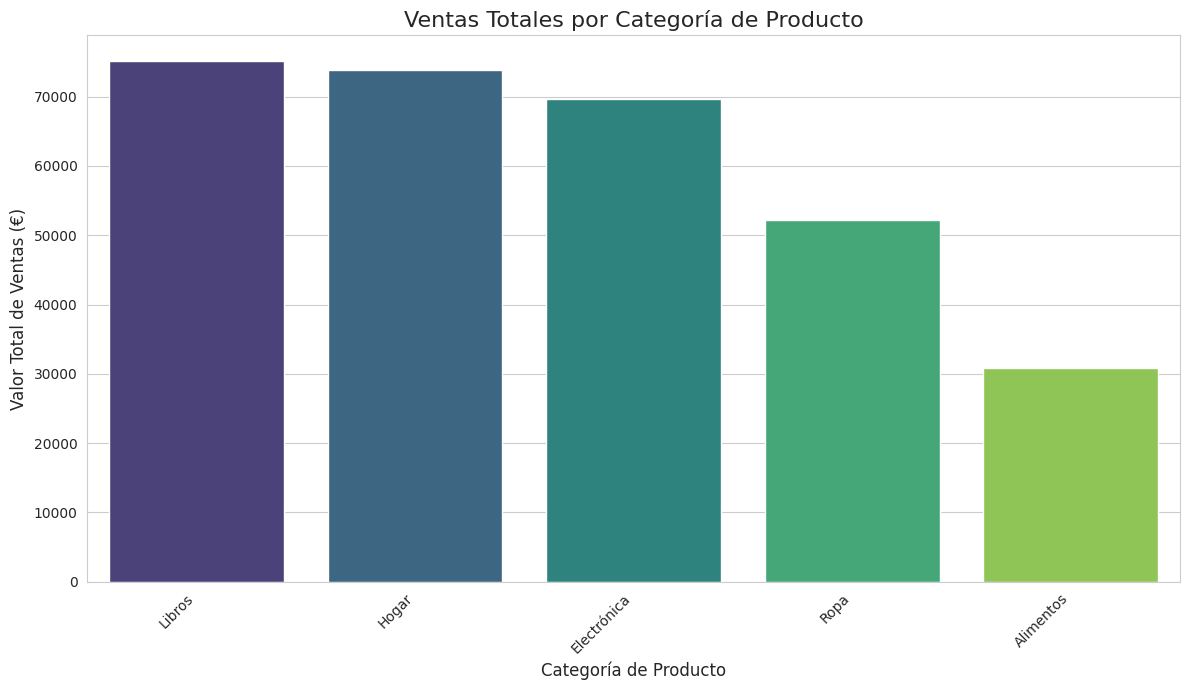

In [ ]:
print("--- Visualización de Datos ---")

# 1. Gráfico de Barras: Ventas Totales por Categoría de Producto
plt.figure(figsize=(12, 7))



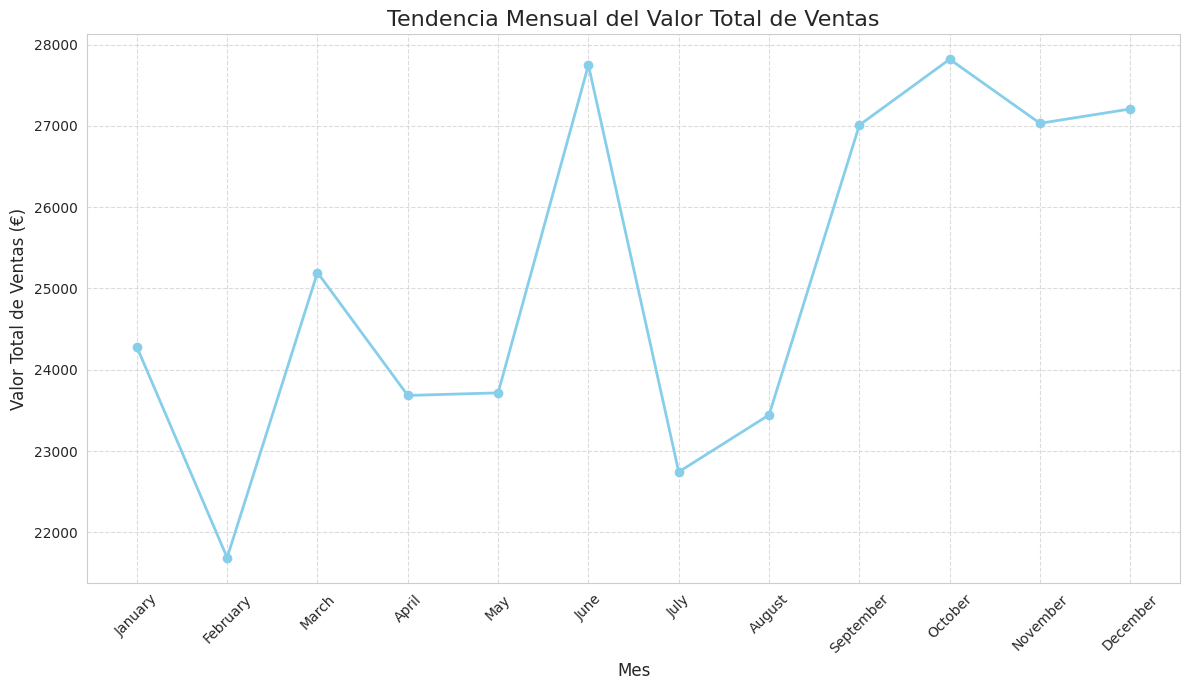

In [ ]:
# 2. Gráfico de Líneas (Estilo OO): Tendencia Mensual de Ventas Totales
# Obtenemos la figura y los ejes para controlar mejor el plot
fig, ax = plt.subplots(figsize=(12, 7))

# Plotear la línea en el objeto ax
ax.plot(analisis_mensual['Mes_Nombre'], analisis_mensual['Valor_Total_Ventas'], marker='o', color='skyblue', linewidth=2)

# Configurar el título y etiquetas usando los métodos del objeto ax


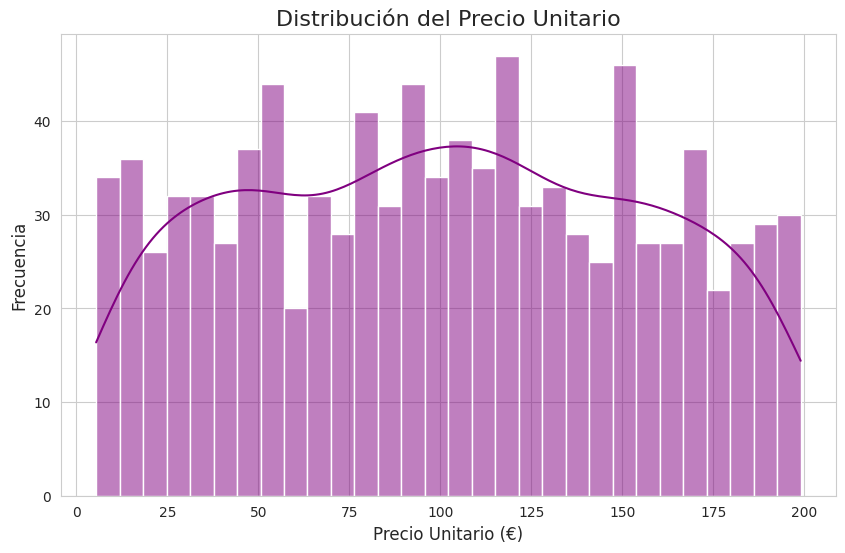

In [ ]:
# 3. Histograma: Distribución del Precio Unitario
plt.figure(figsize=(10, 6))

plt.title('Distribución del Precio Unitario', fontsize=16)
plt.xlabel('Precio Unitario ($)', fontsize=12)
plt.ylabel('Frecuencia', fontsize=12)
plt.show()

/tmp/ipython-input-12-4268398838.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Metodo_Pago', y='Valor_Total_Transaccion', data=df, palette='pastel')


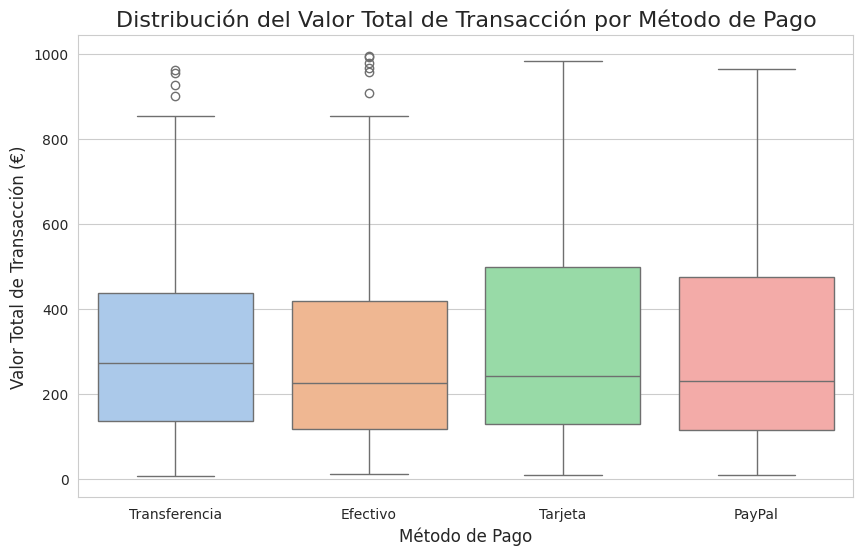

In [ ]:
# 4. Boxplot: Valor Total de Transacción por Método de Pago
plt.figure(figsize=(10, 6))

plt.title('Distribución del Valor Total de Transacción por Método de Pago', fontsize=16)
plt.xlabel('Método de Pago', fontsize=12)
plt.ylabel('Valor Total de Transacción ($)', fontsize=12)
plt.show()


In [ ]:
# 5. Scatter Plot: Calificación del Producto vs. Cantidad Adquirida
fig, ax = plt.subplots(figsize=(10, 6))
sns.scatterplot(x='Cantidad', y='Calificacion_Producto', hue='Categoria_Producto', data=df,
                size='Valor_Total_Transaccion', sizes=(20, 400), alpha=0.7, ax=ax)
ax.set_title('Calificación del Producto vs. Cantidad (con Valor Transacción)', fontsize=16)
ax.set_xlabel('Cantidad de Productos', fontsize=12)
ax.set_ylabel('Calificación del Producto (1-5)', fontsize=12)
ax.grid(axis='y', linestyle='--', alpha=0.7) # Rejilla solo en eje Y
plt.legend(title='Categoría', bbox_to_anchor=(1.05, 1), loc='upper left') # Mover leyenda fuera
plt.tight_layout()

# Guardar esta figura antes de mostrarla
plt.savefig('calificacion_vs_cantidad_productos.png')
print("\nGráfico 'Calificación del Producto vs. Cantidad' guardado como 'calificacion_vs_cantidad_productos.png'.")
plt.show()